# Análise exploratória de dados

Após o tratamento dos dados, passamos para a etapa inicial de análise dos dados procurando por características importantes presentes nos dados e avaliando hipóteses criadas sobre as variáveis presentes. Nossa principal variável de interesse será a nota média de cada aluno, iniciaremos procurando entender como ela se relaciona com as demais variáveis.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [27]:
df = pd.read_csv('data/MICRODADOS_ENEM_SP_2019.csv', encoding = 'latin1')
df['NU_NOTA_REDACAO_SEM_NA'] = df.NU_NOTA_REDACAO.fillna(0)
df['NU_NOTA'] = 0.2 * (df['NU_NOTA_MT'] + df['NU_NOTA_LC'] + df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + df['NU_NOTA_REDACAO_SEM_NA'])

In [37]:
df = pd.read_csv('data/MICRODADOS_ENEM_SP_2019.csv')
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190002018489,2019,3550308,São Paulo,35,SP,20,F,1,0,...,A,A,A,B,A,A,C,A,A,B
1,190002021009,2019,3509502,Campinas,35,SP,26,F,2,3,...,B,A,A,B,A,A,B,A,B,B
2,190002029060,2019,3550308,São Paulo,35,SP,18,M,3,0,...,B,A,A,B,A,A,C,A,A,A
3,190002031178,2019,3550308,São Paulo,35,SP,36,F,1,1,...,B,A,B,B,A,B,B,A,B,B
4,190002034095,2019,3543402,Ribeirão Preto,35,SP,30,M,1,1,...,B,A,B,C,A,A,D,A,C,B


In [38]:
df.shape

(712032, 128)

In [40]:
list(df.isna().sum())

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 17021,
 17021,
 17021,
 17021,
 0,
 0,
 0,
 331462,
 0,
 527015,
 527015,
 527015,
 527015,
 527015,
 527015,
 527015,
 527015,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 205658,
 172001,
 172001,
 205658,
 205658,
 172001,
 172001,
 205658,
 0,
 172001,
 172001,
 172001,
 172001,
 172001,
 172001,
 172001,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [34]:
df[df.isna()]

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_REDACAO_SEM_NA,NU_NOTA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
712028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
712029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
712030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.shape

(712032, 130)

C:\Users\giova\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\giova\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.00000e+00, 1.00000e+01, 5.40000e+01, 2.12000e+03, 2.41820e+04,
        1.37604e+05, 1.89663e+05, 1.14219e+05, 3.45170e+04, 2.70600e+03]),
 array([  0.  ,  83.59, 167.18, 250.77, 334.36, 417.95, 501.54, 585.13,
        668.72, 752.31, 835.9 ]),
 <a list of 10 Patch objects>)

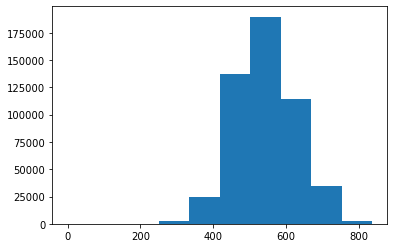

In [24]:
plt.hist(df.NU_NOTA)

In [23]:
alt.Chart(df).mark_bar().encode(
    alt.X("NU_NOTA:Q", bin=True),
    y='count()',
)

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

alt.Chart(...)